https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/file-formats-exercise/  


# Lesson 4. File Formats Exercise

Start with a cvs file and a panda dataframe. Convert data to spatial geodataframe. 

In [1]:
# Importing packages needed to complete this lesson
import os

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import earthpy as et

In [2]:
# Download the data that you will use in this lesson
et.data.get_data(
    url="https://opendata.arcgis.com/datasets/175425c25d8849b58feb89483ef02961_1.csv")

'C:\\Users\\almut\\earth-analytics\\data\\earthpy-downloads\\OSMP_Climbing_Formations.csv'

In [3]:
# Read data
boulder_climbing_path = os.path.join("data",
                                     "earthpy-downloads",
                                     "OSMP_Climbing_Formations.csv")
boulder_climbing = pd.read_csv(boulder_climbing_path)

In [4]:
boulder_climbing.head()

,X,Y,OBJECTID,ID,FEATURE,ROUTES,HCA,OWNER,SeasonalClosure,AreaAccess,AKA,ClosureActive,PERMITREQ,FormationType,Display
0,-105.294224,40.005020,1,1.0,Pumpkin Rock,4.0,No,OSMP,N,Flagstaff,First Areas,N,No,Boulder,Yes
1,-105.287861,39.975276,2,2.0,Veranda,2.0,No,OSMP,N,NCAR,NaN,N,No,Wall,Yes
2,-105.293598,39.995411,3,3.0,Third Pinnacle,7.0,No,OSMP,Y,Gregory Canyon,NaN,N,No,Wall,Yes
3,-105.294391,39.986358,4,4.0,The Fin,1.0,No,OSMP,Y,Chautauqua,NaN,Y,No,Wall,Yes
4,-105.292811,39.995952,5,6.0,First Pinnacle,23.0,No,OSMP,Y,Gregory Canyon,NaN,N,No,Wall,Yes


In [5]:
boulder_climbing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                453 non-null    float64
 1   Y                453 non-null    float64
 2   OBJECTID         453 non-null    int64  
 3   ID               217 non-null    float64
 4   FEATURE          453 non-null    object 
 5   ROUTES           135 non-null    float64
 6   HCA              453 non-null    object 
 7   OWNER            453 non-null    object 
 8   SeasonalClosure  453 non-null    object 
 9   AreaAccess       453 non-null    object 
 10  AKA              49 non-null     object 
 11  ClosureActive    453 non-null    object 
 12  PERMITREQ        453 non-null    object 
 13  FormationType    453 non-null    object 
 14  Display          453 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 53.2+ KB


### Convert to geopandas geodataframe

In [6]:
# Define spatial x,y coordinates
coordinates = gpd.points_from_xy(boulder_climbing.X, boulder_climbing.Y)

# Create geodataframe object
boulder_climbing_gdf = gpd.GeoDataFrame(data=boulder_climbing, 
                                        geometry=coordinates)

boulder_climbing_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   X                453 non-null    float64 
 1   Y                453 non-null    float64 
 2   OBJECTID         453 non-null    int64   
 3   ID               217 non-null    float64 
 4   FEATURE          453 non-null    object  
 5   ROUTES           135 non-null    float64 
 6   HCA              453 non-null    object  
 7   OWNER            453 non-null    object  
 8   SeasonalClosure  453 non-null    object  
 9   AreaAccess       453 non-null    object  
 10  AKA              49 non-null     object  
 11  ClosureActive    453 non-null    object  
 12  PERMITREQ        453 non-null    object  
 13  FormationType    453 non-null    object  
 14  Display          453 non-null    object  
 15  geometry         453 non-null    geometry
dtypes: float64(4), geometry(1), int64(1)

In [7]:
# Save as shape file
#boulder_climbing_gdf.to_file(os.path.join("data",
#                                          "earthpy-downloads",
#                                          "boulder-climbing.shp"))

<AxesSubplot:>

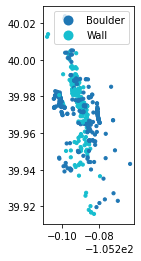

In [8]:
# Plot 
boulder_climbing_gdf.plot(markersize=10, column="FormationType", legend=True)

### Create a base map

In [9]:
# Get the data
et.data.get_data(url="https://opendata.arcgis.com/datasets/955e7a0f52474b60a9866950daf10acb_0.geojson")

'C:\\Users\\almut\\earth-analytics\\data\\earthpy-downloads\\City_Limits.geojson'

In [10]:
# Read data
city_limits_path = os.path.join("data",
                                "earthpy-downloads",
                                "City_Limits.geojson")
city_limits = gpd.read_file(city_limits_path)
city_limits.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       5 non-null      int64   
 1   TYPE           5 non-null      object  
 2   SHAPESTArea    5 non-null      float64 
 3   SHAPESTLength  5 non-null      float64 
 4   geometry       5 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 328.0+ bytes


In [11]:
city_limits.head()

,OBJECTID,TYPE,SHAPESTArea,SHAPESTLength,geometry
0,23,City,7.137964e+07,45960.606599,"POLYGON ((-105.19103 40.08976, -105.18838 40.0..."
1,24,City,4.062025e+07,64671.109443,"POLYGON ((-105.18891 40.07596, -105.18881 40.0..."
2,25,City,8.103168e+04,1661.732555,"POLYGON ((-105.21128 40.01726, -105.21138 40.0..."
3,26,City,2.092505e+07,34856.338250,"POLYGON ((-105.26349 40.08020, -105.26687 40.0..."
4,44,City,6.300651e+08,297109.275900,"POLYGON ((-105.29508 40.04174, -105.29515 40.0..."


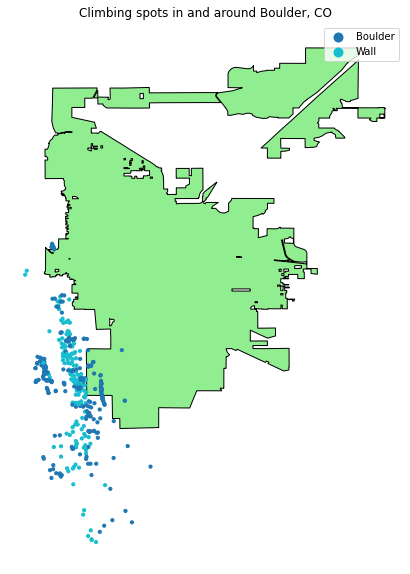

In [12]:
# Plot data: city limits and climbing spots
f, ax1 = plt.subplots(figsize=(10, 10))
city_limits.plot(ax=ax1, color='lightgreen', edgecolor='black')
boulder_climbing_gdf.plot(ax=ax1, markersize=10, column="FormationType", legend=True)
ax1.set_title("Climbing spots in and around Boulder, CO")
ax1.set_axis_off()

### Creating an interactive map

In [13]:
import folium

# Define coordinates of where we want to center our map
map_center_coords = [40.015, -105.2705]

# Create the map
my_map = folium.Map(location = map_center_coords, zoom_start = 13)

climbing_locations = boulder_climbing_gdf

for lat,long,formationtype in zip(climbing_locations.geometry.y, climbing_locations.geometry.x, climbing_locations["FormationType"]):
    #simple marker
    #folium.Marker(location=[lat, long]).add_to(my_map)
    
    # Different markers for wall and boulder
    if formationtype == "Wall":
        folium.RegularPolygonMarker(location=[lat, long], popup = 'Wall', fill_color = 'lightgrey',
                                    number_of_sides = 3, radius = 5,
                                    ).add_to(my_map)
    else:
        folium.CircleMarker(location=[lat, long], popup = 'Boulder', fill_color = 'lightgrey',
                            radius = 5, color='orange'
                            ).add_to(my_map)

my_map

### Clipped map

In [14]:
# Clip map
climbing_in_boulder = gpd.clip(boulder_climbing_gdf, city_limits)

#Ignore warning. 

<ipython-input-14-50739ffa65a9>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  climbing_in_boulder = gpd.clip(boulder_climbing_gdf, city_limits)


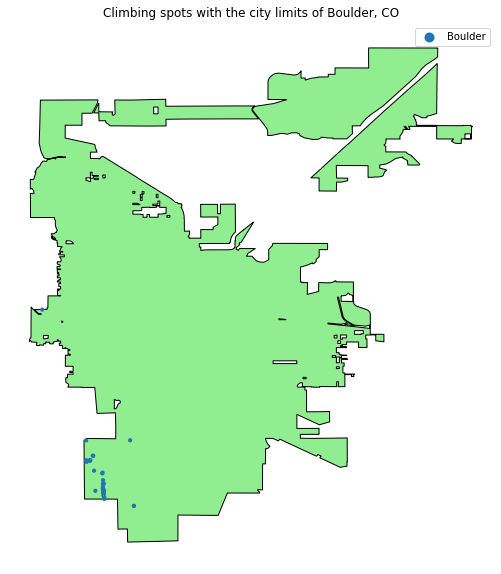

In [15]:
# Plot data: city limits and climbing spots within those limits
f, ax1 = plt.subplots(figsize=(10, 10))
city_limits.plot(ax=ax1, color='lightgreen', edgecolor='black')
climbing_in_boulder.plot(ax=ax1, markersize=10, column="FormationType", legend=True)
ax1.set_title("Climbing spots with the city limits of Boulder, CO")
ax1.set_axis_off()